In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
data=pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: xlabel='age', ylabel='Count'>

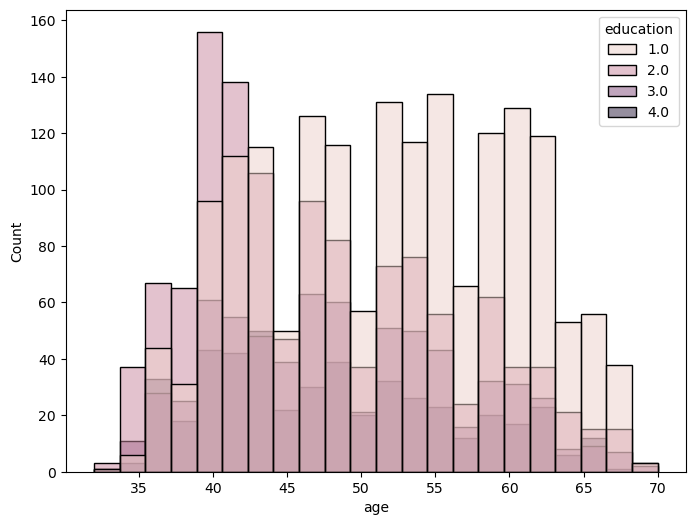

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(x="age",data=data,hue="education")

<Axes: xlabel='age', ylabel='heartRate'>

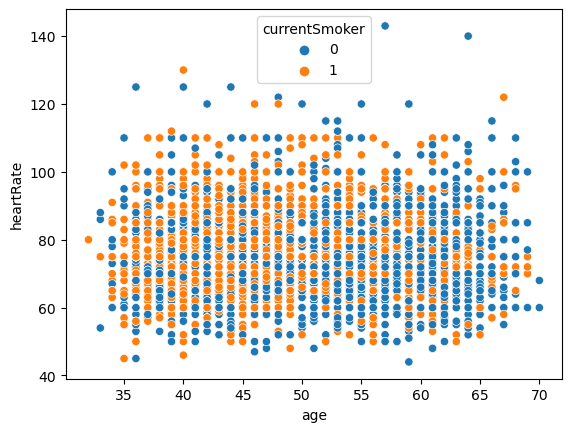

In [7]:
sns.scatterplot(x="age",y="heartRate",hue="currentSmoker",data=data)

<Axes: xlabel='age', ylabel='heartRate'>

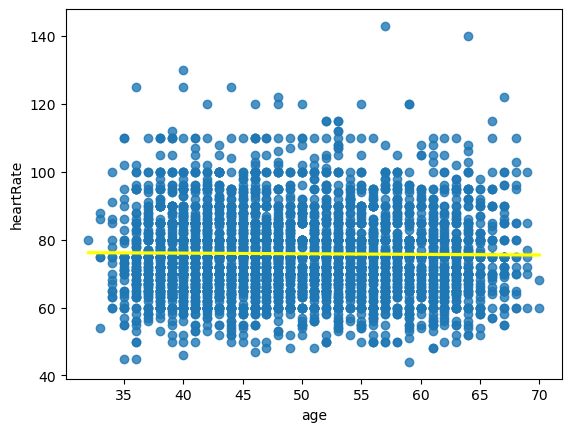

In [8]:
sns.regplot(x="age",y="heartRate",data=data,line_kws={"color": "yellow"})

In [9]:
data=data.fillna(0)

In [10]:
model=LogisticRegression(max_iter=1000,solver='liblinear')

In [11]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [13]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [14]:
pred=model.predict(X_test)

In [15]:
np.array(model.predict(X_train)-y_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
model.score(X_train,y_train)

0.8550078657577347

array([[353,   1],
       [ 67,   3]], dtype=int64)

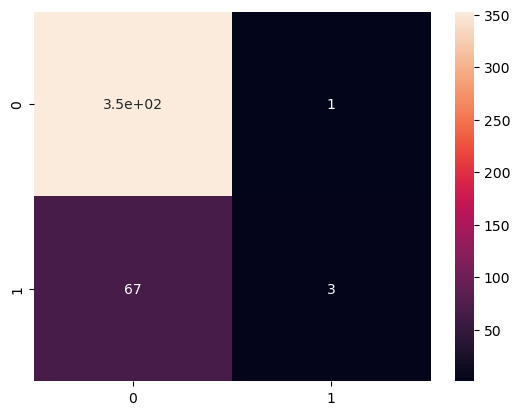

In [17]:
mat=confusion_matrix(y_test,pred)

sns.heatmap(mat.astype(int),annot=True)
mat


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       354
           1       0.75      0.04      0.08        70

    accuracy                           0.84       424
   macro avg       0.80      0.52      0.50       424
weighted avg       0.83      0.84      0.77       424

